In [ ]:
 import pandas
import numpy
import networkx as nx
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree

DESCRIPCIÓN: Los datos son sobre co-delincuencia en una pandilla callejera del centro de la ciudad con sede en Londres, 2005-2009, que opera desde una urbanización social. Los datos provienen de datos anónimos de arrestos y condenas policiales de los miembros "confirmados" de la pandilla.

FORMATO DE DATOS: UCINET, .csv

DATOS: Matriz 1-Modal 54 x 54 personas por personas, no dirigido, valorado.

Valores de enlace de red:
                = 1 (pasar el rato juntos)
                = 2 (co-delinquen juntos)
                = 3 (cometer delitos juntos, delito grave)
                = 4 (co-delinquen juntos, delito grave, parientes)

Atributos: Edad, Lugar de nacimiento (1 = África Occidental, 2 = Caribe, 3 = Reino Unido, 4 = África Oriental), Residencia, Arrestos, Condenas, Prisión, Música.

!cd por ejemplo para que no lo reconozca como pyton

   1   2   3   4   5   6   7   8   9   ...  46  47  48  49  50  51  52  53  54
0   0   1   1   2   1   1   2   3   2  ...   1   0   0   0   0   1   0   0   0
1   1   0   3   0   0   2   1   2   1  ...   0   0   0   0   0   0   0   0   0
2   1   3   0   4   4   3   1   3   2  ...   0   0   0   0   0   0   0   0   2
3   2   0   4   0   4   3   1   0   0  ...   0   0   0   1   0   0   0   0   0
4   1   0   4   4   0   3   1   0   1  ...   0   1   0   1   0   0   0   0   0

[5 rows x 54 columns]


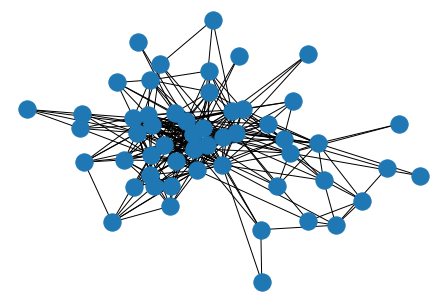

In [ ]:
data = pandas.read_csv("LONDON_GANG.csv",header=None,skiprows=1)
#borramos la primera fila y columna
data = data.iloc[: , 1:]
#printeamos las 5 primeras filas
print(data.head())
#dibujamos un grafo dirigido para calcular los grados con el comando in_degree y out_degree
grafo = nx.Graph(data.values)
nx.draw(grafo)


In [ ]:
dataAttr = pandas.read_csv("LONDON_GANG_ATTR.csv",header=None,names=["Age","Birthplace","Residence","Arrests","Convictions","Prison","Music","Ranking"],skiprows=1)

print(dataAttr.head(5))

   Age  Birthplace  Residence  Arrests  Convictions  Prison  Music  Ranking
1   20           1          0       16            4       1      1        1
2   20           2          0       16            7       1      0        2
3   19           2          0       12            4       1      0        2
4   21           2          0        8            1       0      0        2
5   24           2          0       11            3       0      0        2


In [ ]:
d = nx.coloring.greedy_color(grafo)
lColoring=sorted(d.items())
coloring = []
for e in lColoring:
  coloring.append(e[1])
print(coloring)

[0, 6, 4, 3, 6, 5, 1, 5, 8, 7, 10, 2, 1, 0, 7, 2, 1, 7, 0, 1, 9, 3, 4, 0, 5, 2, 4, 1, 11, 3, 0, 1, 3, 1, 6, 7, 0, 1, 0, 2, 2, 3, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 0, 2]


In [ ]:
valencia = grafo.degree
print(valencia)

[(0, 25), (1, 22), (2, 22), (3, 21), (4, 19), (5, 16), (6, 25), (7, 15), (8, 21), (9, 22), (10, 18), (11, 25), (12, 11), (13, 24), (14, 7), (15, 8), (16, 5), (17, 14), (18, 13), (19, 15), (20, 19), (21, 24), (22, 23), (23, 6), (24, 23), (25, 6), (26, 8), (27, 18), (28, 17), (29, 5), (30, 12), (31, 7), (32, 10), (33, 8), (34, 12), (35, 12), (36, 7), (37, 2), (38, 2), (39, 2), (40, 5), (41, 5), (42, 6), (43, 4), (44, 2), (45, 5), (46, 3), (47, 5), (48, 3), (49, 2), (50, 7), (51, 4), (52, 2), (53, 6)]


In [ ]:
centrality = nx.degree_centrality(grafo)
print(centrality)


{0: 0.4716981132075472, 1: 0.4150943396226415, 2: 0.4150943396226415, 3: 0.3962264150943396, 4: 0.3584905660377358, 5: 0.3018867924528302, 6: 0.4716981132075472, 7: 0.2830188679245283, 8: 0.3962264150943396, 9: 0.4150943396226415, 10: 0.33962264150943394, 11: 0.4716981132075472, 12: 0.20754716981132074, 13: 0.4528301886792453, 14: 0.1320754716981132, 15: 0.1509433962264151, 16: 0.09433962264150943, 17: 0.2641509433962264, 18: 0.24528301886792453, 19: 0.2830188679245283, 20: 0.3584905660377358, 21: 0.4528301886792453, 22: 0.43396226415094336, 23: 0.11320754716981132, 24: 0.43396226415094336, 25: 0.11320754716981132, 26: 0.1509433962264151, 27: 0.33962264150943394, 28: 0.32075471698113206, 29: 0.09433962264150943, 30: 0.22641509433962265, 31: 0.1320754716981132, 32: 0.18867924528301885, 33: 0.1509433962264151, 34: 0.22641509433962265, 35: 0.22641509433962265, 36: 0.1320754716981132, 37: 0.03773584905660377, 38: 0.03773584905660377, 39: 0.03773584905660377, 40: 0.09433962264150943, 41: 0.

In [ ]:
clust = nx.clustering(grafo)
print(clust)

{0: 0.4533333333333333, 1: 0.5454545454545454, 2: 0.48484848484848486, 3: 0.38095238095238093, 4: 0.4678362573099415, 5: 0.5416666666666666, 6: 0.46, 7: 0.8, 8: 0.5285714285714286, 9: 0.5108225108225108, 10: 0.5751633986928104, 11: 0.49333333333333335, 12: 0.6, 13: 0.37318840579710144, 14: 0.8095238095238095, 15: 0.5714285714285714, 16: 1.0, 17: 0.5384615384615384, 18: 0.34615384615384615, 19: 0.3619047619047619, 20: 0.672514619883041, 21: 0.5072463768115942, 22: 0.5019762845849802, 23: 0.8666666666666667, 24: 0.45849802371541504, 25: 0.8666666666666667, 26: 0.9285714285714286, 27: 0.49673202614379086, 28: 0.6838235294117647, 29: 0.9, 30: 0.5909090909090909, 31: 0.7142857142857143, 32: 0.6444444444444445, 33: 0.8928571428571429, 34: 0.6515151515151515, 35: 0.6515151515151515, 36: 0.7142857142857143, 37: 1.0, 38: 1.0, 39: 1.0, 40: 0.6, 41: 0.5, 42: 0.26666666666666666, 43: 0.3333333333333333, 44: 1.0, 45: 0.5, 46: 0.6666666666666666, 47: 0.7, 48: 1.0, 49: 1.0, 50: 0.5714285714285714, 51

In [ ]:
grado=[ j for _,j in valencia()]
print(grado)

[25, 22, 22, 21, 19, 16, 25, 15, 21, 22, 18, 25, 11, 24, 7, 8, 5, 14, 13, 15, 19, 24, 23, 6, 23, 6, 8, 18, 17, 5, 12, 7, 10, 8, 12, 12, 7, 2, 2, 2, 5, 5, 6, 4, 2, 5, 3, 5, 3, 2, 7, 4, 2, 6]


In [ ]:
gCentrality=[ a for a in centrality.values()]
print(gCentrality)

[0.4716981132075472, 0.4150943396226415, 0.4150943396226415, 0.3962264150943396, 0.3584905660377358, 0.3018867924528302, 0.4716981132075472, 0.2830188679245283, 0.3962264150943396, 0.4150943396226415, 0.33962264150943394, 0.4716981132075472, 0.20754716981132074, 0.4528301886792453, 0.1320754716981132, 0.1509433962264151, 0.09433962264150943, 0.2641509433962264, 0.24528301886792453, 0.2830188679245283, 0.3584905660377358, 0.4528301886792453, 0.43396226415094336, 0.11320754716981132, 0.43396226415094336, 0.11320754716981132, 0.1509433962264151, 0.33962264150943394, 0.32075471698113206, 0.09433962264150943, 0.22641509433962265, 0.1320754716981132, 0.18867924528301885, 0.1509433962264151, 0.22641509433962265, 0.22641509433962265, 0.1320754716981132, 0.03773584905660377, 0.03773584905660377, 0.03773584905660377, 0.09433962264150943, 0.09433962264150943, 0.11320754716981132, 0.07547169811320754, 0.03773584905660377, 0.09433962264150943, 0.05660377358490566, 0.09433962264150943, 0.05660377358

In [ ]:
gClustering=[ a for a in clust.values()]
print(gClustering)

[0.4533333333333333, 0.5454545454545454, 0.48484848484848486, 0.38095238095238093, 0.4678362573099415, 0.5416666666666666, 0.46, 0.8, 0.5285714285714286, 0.5108225108225108, 0.5751633986928104, 0.49333333333333335, 0.6, 0.37318840579710144, 0.8095238095238095, 0.5714285714285714, 1.0, 0.5384615384615384, 0.34615384615384615, 0.3619047619047619, 0.672514619883041, 0.5072463768115942, 0.5019762845849802, 0.8666666666666667, 0.45849802371541504, 0.8666666666666667, 0.9285714285714286, 0.49673202614379086, 0.6838235294117647, 0.9, 0.5909090909090909, 0.7142857142857143, 0.6444444444444445, 0.8928571428571429, 0.6515151515151515, 0.6515151515151515, 0.7142857142857143, 1.0, 1.0, 1.0, 0.6, 0.5, 0.26666666666666666, 0.3333333333333333, 1.0, 0.5, 0.6666666666666666, 0.7, 1.0, 1.0, 0.5714285714285714, 1.0, 0, 0.4666666666666667]


In [ ]:
londonatt= pandas.read_csv("LONDON_GANG_ATTR.csv",header=None,names=["Age","Birthplace","Residence","Arrests","Convictions","Prison","Music","Ranking"],skiprows=1)
londonatt2= pandas.read_csv("LONDON_GANG_ATTR.csv",header=None,names=["Age","Birthplace","Residence","Arrests","Convictions","Prison","Music","Ranking"],skiprows=1)
londonatt3= pandas.read_csv("LONDON_GANG_ATTR.csv",header=None,names=["Age","Birthplace","Residence","Arrests","Convictions","Prison","Music","Ranking"],skiprows=1)
londonatt4= pandas.read_csv("LONDON_GANG_ATTR.csv",header=None,names=["Age","Birthplace","Residence","Arrests","Convictions","Prison","Music","Ranking"],skiprows=1)
dataAtt2 = pandas.DataFrame(londonatt2)
dataAtt2["Centrality"] = gCentrality
dataAtt3 = pandas.DataFrame(londonatt3)
dataAtt3["Clustering"] = gClustering
dataAtt4 = pandas.DataFrame(londonatt4)
dataAtt4["Coloreado"] = coloring


dataAtt = pandas.DataFrame(londonatt)
dataAtt["grado"] = grado
dataAtt["Centrality"] = gCentrality
dataAtt["Clustering"] = gClustering
dataAtt["Coloreado"] = coloring
dataAtt4.head()

,Age,Birthplace,Residence,Arrests,Convictions,Prison,Music,Ranking,Coloreado
1,20,1,0,16,4,1,1,1,0
2,20,2,0,16,7,1,0,2,6
3,19,2,0,12,4,1,0,2,4
4,21,2,0,8,1,0,0,2,3
5,24,2,0,11,3,0,0,2,6


In [ ]:
#Aquí empieza con el modelo relaciones

dataAttChanged = dataAtt[["Age","Birthplace","Residence","Arrests","Convictions","Music","Ranking","grado","Centrality","Clustering","Coloreado"]]
dataAttChanged2 = dataAtt2[["Age","Birthplace","Residence","Arrests","Convictions","Music","Ranking","Centrality"]]
dataAttChanged3 = dataAtt3[["Age","Birthplace","Residence","Arrests","Convictions","Music","Ranking","Clustering"]]
dataAttChanged4 = dataAtt4[["Age","Birthplace","Residence","Arrests","Convictions","Music","Ranking","Coloreado"]]
atributosRelacionales = dataAttChanged.loc[:, "Age":"Coloreado"]
objetivo = dataAtt["Prison"]
atributosRelacionales.head(5)

,Age,Birthplace,Residence,Arrests,Convictions,Music,Ranking,grado,Centrality,Clustering,Coloreado
1,20,1,0,16,4,1,1,25,0.471698,0.453333,0
2,20,2,0,16,7,0,2,22,0.415094,0.545455,6
3,19,2,0,12,4,0,2,22,0.415094,0.484848,4
4,21,2,0,8,1,0,2,21,0.396226,0.380952,3
5,24,2,0,11,3,0,2,19,0.358491,0.467836,6


In [ ]:
atributos = dataAttChanged.loc[:, "Age":"Ranking"]
atributos_grado = dataAttChanged.loc[:, "Age":"grado"]
atributos_centrality =  dataAttChanged2.loc[:, "Age":"Centrality"]
atributos_clustering =  dataAttChanged3.loc[:, "Age":"Clustering"]
atributos_coloreado =  dataAttChanged4.loc[:, "Age":"Coloreado"]


In [ ]:
atributos_clustering.head(5)

,Age,Birthplace,Residence,Arrests,Convictions,Music,Ranking,Clustering
1,20,1,0,16,4,1,1,0.453333
2,20,2,0,16,7,0,2,0.545455
3,19,2,0,12,4,0,2,0.484848
4,21,2,0,8,1,0,2,0.380952
5,24,2,0,11,3,0,2,0.467836


In [ ]:
objetivo.head(5)

1    1
2    1
3    1
4    0
5    0
Name: Prison, dtype: int64

In [ ]:
print(pandas.Series(objetivo).value_counts(normalize=False))

0    30
1    24
Name: Prison, dtype: int64


Modelo de entrenamiento

In [ ]:
#modelo de entrenamiento para los atributos normales
(atributos_entrenamiento, atributos_prueba, objetivo_entrenamiento, objetivo_prueba)= model_selection.train_test_split(atributos,objetivo,random_state=3333,test_size=.33,stratify=objetivo)

In [ ]:
#modelo de entrenamiento para los atributos relacionales
(atributos_entrenamiento_relacional, atributos_prueba_relacional, objetivo_entrenamiento_relacional, objetivo_prueba_relacional)= model_selection.train_test_split(atributosRelacionales,objetivo,random_state=3333,test_size=.33,stratify=objetivo)

In [ ]:
(atributos_entrenamiento_grado, atributos_prueba_grado, objetivo_entrenamiento_grado, objetivo_prueba_grado)= model_selection.train_test_split(atributos_grado,objetivo,random_state=3333,test_size=.33,stratify=objetivo)

In [ ]:
(atributos_entrenamiento_centrality, atributos_prueba_centrality, objetivo_entrenamiento_centrality, objetivo_prueba_centrality)= model_selection.train_test_split(atributos_centrality,objetivo,random_state=3333,test_size=.33,stratify=objetivo)

In [ ]:
(atributos_entrenamiento_clustering, atributos_prueba_clustering, objetivo_entrenamiento_clustering, objetivo_prueba_clustering)= model_selection.train_test_split(atributos_clustering,objetivo,random_state=3333,test_size=.33,stratify=objetivo)

In [ ]:
(atributos_entrenamiento_coloreado, atributos_prueba_coloreado, objetivo_entrenamiento_coloreado, objetivo_prueba_coloreado)= model_selection.train_test_split(atributos_coloreado,objetivo,random_state=3333,test_size=.33,stratify=objetivo)

In [ ]:
print("MODELO DE ATRIBUTOS POR DEFECTO")
print("prueba")
print("ejemplos Necesarios:", 54 * .33)
print("filas de array:", atributos_prueba.shape[0])
print("longitud objetivo de prueba", len(objetivo_prueba))
print("entrenamiento")
print("ejemplos Necesarios:", 54 * .67)
print("filas de array:", atributos_entrenamiento.shape[0])
print("longitud objetivo de prueba", len(objetivo_entrenamiento))

MODELO DE ATRIBUTOS POR DEFECTO
prueba
ejemplos Necesarios: 17.82
filas de array: 18
longitud objetivo de prueba 18
entrenamiento
ejemplos Necesarios: 36.18
filas de array: 36
longitud objetivo de prueba 36


In [ ]:
print("MODELO DE ATRIBUTOS POR DEFECTO Y RELACIONALES")
print("prueba")
print("ejemplos Necesarios:", 54 * .33)
print("filas de array:", atributos_prueba_relacional.shape[0])
print("longitud objetivo de prueba", len(objetivo_prueba_relacional))
print("entrenamiento")
print("ejemplos Necesarios:", 54 * .67)
print("filas de array:", atributos_entrenamiento_relacional.shape[0])
print("longitud objetivo de prueba", len(objetivo_entrenamiento_relacional))

MODELO DE ATRIBUTOS POR DEFECTO Y RELACIONALES
prueba
ejemplos Necesarios: 17.82
filas de array: 18
longitud objetivo de prueba 18
entrenamiento
ejemplos Necesarios: 36.18
filas de array: 36
longitud objetivo de prueba 36


Naive Bayes


In [ ]:
#last chance
codificador_atributos = preprocessing.OrdinalEncoder()
atributos_codificados = codificador_atributos.fit_transform(atributos)

codificador_objetivo = preprocessing.LabelEncoder()
objetivo_codificado = codificador_objetivo.fit_transform(objetivo)

(atributos_entrenamiento_cod, atributos_prueba_cod,
 objetivo_entrenamiento_cod, objetivo_prueba_cod) = model_selection.train_test_split(
    
    atributos_codificados, objetivo_codificado,
    random_state=3333,
    test_size=.33,
    stratify=objetivo_codificado)


In [ ]:
#alpha = hiperparametro de suavizado
naivbayes = naive_bayes.CategoricalNB(alpha=1.0)
naivbayes.fit(atributos_entrenamiento, objetivo_entrenamiento)


CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
sc=naivbayes.score(atributos_prueba,objetivo_prueba)
print("la puntuación de naive bayes sobre los atributos de prueba y entrenamiento es :",sc)

la puntuación de naive bayes sobre los atributos de prueba y entrenamiento es : 0.6111111111111112


Los datos recopilados anteriormente nos proporcionan la puntuación de el modelo naive bayes sobre el conjunto de prueba sin introducir los atributos propios del grafo. 

In [ ]:
#Naive Bayes Relacional
naivbayesRelacional = naive_bayes.CategoricalNB(alpha=1.0)
naivbayesRelacional.fit(atributos_entrenamiento_relacional , objetivo_entrenamiento_relacional)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#naivbayesRelacional.score(atributos_prueba_relacional,objetivo_prueba_relacional)

KNN


In [ ]:
 #distancia de hamming
 for n in range(1,5):
  KNN= neighbors.KNeighborsClassifier(n_neighbors=n,metric="hamming")
  KNN.fit(atributos_entrenamiento,objetivo_entrenamiento)
  scores = cross_val_score(KNN, X=atributos_entrenamiento, y=objetivo_entrenamiento, cv=10)
  media_score=0
  for i in scores:
    media_score+=i
  media_score/=scores.size
  print("Para los atributos originales la puntuación")
  if(n==1):
    print("con", n, "vecino es",media_score)
  else:
    print("con", n, "vecinos es",media_score)
  


Para los atributos originales la puntuación
con 1 vecino es 0.5333333333333333
Para los atributos originales la puntuación
con 2 vecinos es 0.5666666666666667
Para los atributos originales la puntuación
con 3 vecinos es 0.4666666666666666
Para los atributos originales la puntuación
con 4 vecinos es 0.4916666666666667


In [ ]:
#euclidean
for n in range(1,5):
  KNN= neighbors.KNeighborsClassifier(n_neighbors=n,metric="euclidean")
  KNN.fit(atributos_entrenamiento,objetivo_entrenamiento)
  scores = cross_val_score(KNN, X=atributos_entrenamiento, y=objetivo_entrenamiento, cv=10)
  media_score=0
  for i in scores:
    media_score+=i
  media_score/=scores.size
  print("Para los atributos originales la puntuación")
  if(n==1):
    print("con", n, "vecino es",media_score)
  else:
    print("con", n, "vecinos es",media_score)
  

Para los atributos originales la puntuación
con 1 vecino es 0.7750000000000001
Para los atributos originales la puntuación
con 2 vecinos es 0.7250000000000001
Para los atributos originales la puntuación
con 3 vecinos es 0.6083333333333333
Para los atributos originales la puntuación
con 4 vecinos es 0.7583333333333334


In [ ]:
nuevos_ejemplos = [[20,1,0,16,4,1,1],[20,2,0,16,7,0,2]]

In [ ]:
distancias, vecinos = KNN.kneighbors(nuevos_ejemplos)

In [ ]:
# Vecinos más cercanos y distancia a ellos del primer ejemplo nuevo
print("Primer ejemplo nuevo:", nuevos_ejemplos[0])
print("5 vecinos más cercanos:")
print(vecinos[0])
# Los números que nos da vecinos[0] representan el indice de las filas que mas se parecen a nuestros números en los atributos de entrenamiento
print("Distancias a esos vecinos (cantidad de atributos con valores distintos / cantidad total de atributos):")
print(distancias[0])


Primer ejemplo nuevo: [20, 1, 0, 16, 4, 1, 1]
5 vecinos más cercanos:
[ 5 28 30 23]
Distancias a esos vecinos (cantidad de atributos con valores distintos / cantidad total de atributos):
[0.         3.16227766 3.46410162 5.29150262]


In [ ]:
# Vecinos más cercanos y distancia a ellos del segundo ejemplo nuevo
print("Primer ejemplo nuevo:", nuevos_ejemplos[1])
print("5 vecinos más cercanos:")
print(vecinos[1])
# Los números que nos da vecinos[1] representan el indice de las filas que mas se parecen a nuestros números en los atributos de entrenamiento
print("Distancias a esos vecinos (cantidad de atributos con valores distintos / cantidad total de atributos):")
print(distancias[1])

Primer ejemplo nuevo: [20, 2, 0, 16, 7, 0, 2]
5 vecinos más cercanos:
[30 28 23  5]
Distancias a esos vecinos (cantidad de atributos con valores distintos / cantidad total de atributos):
[0.         2.44948974 3.16227766 3.46410162]


In [ ]:
KNN.score(atributos_prueba,objetivo_prueba)

0.6666666666666666

A partir de aquí probaremos el Modelo knn con datos relacionales

In [ ]:
#hamming
for n in range(1,5):
  #todos los attr
  KNN_relacional= neighbors.KNeighborsClassifier(n_neighbors=n,metric="hamming")
  KNN_relacional.fit(atributos_entrenamiento_relacional,objetivo_entrenamiento_relacional)
  scores = cross_val_score(KNN_relacional, X=atributos_entrenamiento_relacional, y=objetivo_entrenamiento_relacional, cv=10)
  media_score=0
  #grado
  KNN_grado= neighbors.KNeighborsClassifier(n_neighbors=n,metric="hamming")
  KNN_grado.fit(atributos_entrenamiento_grado,objetivo_entrenamiento_grado)
  scores_grado = cross_val_score(KNN_grado, X=atributos_entrenamiento_grado, y=objetivo_entrenamiento_grado, cv=10)
  media_score_grado=0
  #centralidad
  KNN_centralidad= neighbors.KNeighborsClassifier(n_neighbors=n,metric="hamming")
  KNN_centralidad.fit(atributos_entrenamiento_centrality,objetivo_entrenamiento_centrality)
  scores_centralidad = cross_val_score(KNN_centralidad, X=atributos_entrenamiento_centrality, y=objetivo_entrenamiento_centrality, cv=10)
  media_score_centralidad=0
  #clustering
  KNN_clustering= neighbors.KNeighborsClassifier(n_neighbors=n,metric="hamming")
  KNN_clustering.fit(atributos_entrenamiento_clustering,objetivo_entrenamiento_clustering)
  scores_clustering = cross_val_score(KNN_clustering, X=atributos_entrenamiento_clustering, y=objetivo_entrenamiento_clustering, cv=10)
  media_score_clustering=0
  #coloreado
  KNN_coloreado= neighbors.KNeighborsClassifier(n_neighbors=n,metric="hamming")
  KNN_coloreado.fit(atributos_entrenamiento_coloreado,objetivo_entrenamiento_coloreado)
  scores_coloreado = cross_val_score(KNN_coloreado, X=atributos_entrenamiento_coloreado, y=objetivo_entrenamiento_coloreado, cv=10)
  media_score_coloreado=0
  for i in scores:
    media_score+=i
  media_score/=scores.size
  #
  for i in scores_grado:
    media_score_grado+=i
  media_score_grado/=scores_grado.size
  #
  for i in scores_centralidad:
    media_score_centralidad+=i
  media_score_centralidad/=scores_centralidad.size
  #
  for i in scores_clustering:
    media_score_clustering+=i
  media_score_clustering/=scores_clustering.size
  #
  for i in scores_coloreado:
    media_score_coloreado+=i
  media_score_coloreado/=scores_coloreado.size
  if(n==1):
    print("=========================================================")
    print("media de la puntuación con", n, "vecino y distancia hamming:")
  else:
    print("=========================================================")
    print("media de la puntuación con", n, "vecinos y distancia hamming:")
  print("Para todos los atributos relacionales:",media_score)
  print("Para el atributo relacional grado: ",media_score_grado)
  print("Para el atributo relacional centralidad: ",media_score_centralidad)
  print("Para el atributo relacional clustering: ",media_score_clustering)
  print("Para el atributo relacional coloreado ",media_score_coloreado)
  

media de la puntuación con 1 vecino y distancia hamming:
Para todos los atributos relacionales: 0.4416666666666667
Para el atributo relacional grado:  0.475
Para el atributo relacional centralidad:  0.475
Para el atributo relacional clustering:  0.5333333333333333
Para el atributo relacional coloreado  0.5583333333333333
media de la puntuación con 2 vecinos y distancia hamming:
Para todos los atributos relacionales: 0.6500000000000001
Para el atributo relacional grado:  0.5166666666666667
Para el atributo relacional centralidad:  0.5166666666666667
Para el atributo relacional clustering:  0.5666666666666667
Para el atributo relacional coloreado  0.5916666666666667
media de la puntuación con 3 vecinos y distancia hamming:
Para todos los atributos relacionales: 0.5333333333333334
Para el atributo relacional grado:  0.4916666666666666
Para el atributo relacional centralidad:  0.4916666666666666
Para el atributo relacional clustering:  0.4666666666666666
Para el atributo relacional colorea

In [ ]:
KNN_relacional.score(atributos_prueba_relacional,objetivo_prueba_relacional)

0.4444444444444444

In [ ]:
#euclidean
for n in range(1,5):
  #todos los attr
  KNN_relacional= neighbors.KNeighborsClassifier(n_neighbors=n,metric="euclidean")
  KNN_relacional.fit(atributos_entrenamiento_relacional,objetivo_entrenamiento_relacional)
  scores = cross_val_score(KNN_relacional, X=atributos_entrenamiento_relacional, y=objetivo_entrenamiento_relacional, cv=10)
  media_score=0
  #grado
  KNN_grado= neighbors.KNeighborsClassifier(n_neighbors=n,metric="euclidean")
  KNN_grado.fit(atributos_entrenamiento_grado,objetivo_entrenamiento_grado)
  scores_grado = cross_val_score(KNN_grado, X=atributos_entrenamiento_grado, y=objetivo_entrenamiento_grado, cv=10)
  media_score_grado=0
  #centralidad
  KNN_centralidad= neighbors.KNeighborsClassifier(n_neighbors=n,metric="euclidean")
  KNN_centralidad.fit(atributos_entrenamiento_centrality,objetivo_entrenamiento_centrality)
  scores_centralidad = cross_val_score(KNN_centralidad, X=atributos_entrenamiento_centrality, y=objetivo_entrenamiento_centrality, cv=10)
  media_score_centralidad=0
  #clustering
  KNN_clustering= neighbors.KNeighborsClassifier(n_neighbors=n,metric="euclidean")
  KNN_clustering.fit(atributos_entrenamiento_clustering,objetivo_entrenamiento_clustering)
  scores_clustering = cross_val_score(KNN_clustering, X=atributos_entrenamiento_clustering, y=objetivo_entrenamiento_clustering, cv=10)
  media_score_clustering=0
  #coloreado
  KNN_coloreado= neighbors.KNeighborsClassifier(n_neighbors=n,metric="euclidean")
  KNN_coloreado.fit(atributos_entrenamiento_coloreado,objetivo_entrenamiento_coloreado)
  scores_coloreado = cross_val_score(KNN_coloreado, X=atributos_entrenamiento_coloreado, y=objetivo_entrenamiento_coloreado, cv=10)
  media_score_coloreado=0
  for i in scores:
    media_score+=i
  media_score/=scores.size
  #
  for i in scores_grado:
    media_score_grado+=i
  media_score_grado/=scores_grado.size
  #
  for i in scores_centralidad:
    media_score_centralidad+=i
  media_score_centralidad/=scores_centralidad.size
  #
  for i in scores_clustering:
    media_score_clustering+=i
  media_score_clustering/=scores_clustering.size
  #
  for i in scores_coloreado:
    media_score_coloreado+=i
  media_score_coloreado/=scores_coloreado.size
  if(n==1):
    print("===========================================================")
    print("media de la puntuación con", n, "vecino y distancia euclídea:")
  else:
    print("===========================================================")
    print("media de la puntuación con", n, "vecinos y distancia euclídea:")
  print("Para todos los atributos relacionales:",media_score)
  print("Para el atributo relacional grado: ",media_score_grado)
  print("Para el atributo relacional centralidad: ",media_score_centralidad)
  print("Para el atributo relacional clustering: ",media_score_clustering)
  print("Para el atributo relacional coloreado ",media_score_coloreado)

media de la puntuación con 1 vecino y distancia euclídea:
Para todos los atributos relacionales: 0.6916666666666667
Para el atributo relacional grado:  0.6666666666666667
Para el atributo relacional centralidad:  0.7083333333333333
Para el atributo relacional clustering:  0.6833333333333333
Para el atributo relacional coloreado  0.6583333333333333
media de la puntuación con 2 vecinos y distancia euclídea:
Para todos los atributos relacionales: 0.7
Para el atributo relacional grado:  0.7083333333333334
Para el atributo relacional centralidad:  0.7250000000000001
Para el atributo relacional clustering:  0.7000000000000001
Para el atributo relacional coloreado  0.6083333333333333
media de la puntuación con 3 vecinos y distancia euclídea:
Para todos los atributos relacionales: 0.6916666666666667
Para el atributo relacional grado:  0.6916666666666667
Para el atributo relacional centralidad:  0.6083333333333333
Para el atributo relacional clustering:  0.5833333333333333
Para el atributo rela

In [ ]:
KNN_relacional.score(atributos_prueba_relacional,objetivo_prueba_relacional)

0.7222222222222222

# Árboles de decisión

Árboles de decisión


In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(atributos_entrenamiento , objetivo_entrenamiento)

In [ ]:
scores = cross_val_score(clf, X=atributos_entrenamiento, y=objetivo_entrenamiento, cv=8)
for i in scores:
  media_score+=i
media_score/=scores.size
media_originales=media_score
print("la media de la puntuación mediante validación cruzada es",media_score)

la media de la puntuación mediante validación cruzada es 0.6604166666666667


In [ ]:
clf.score(atributos_prueba,objetivo_prueba)

0.6111111111111112

[Text(179.35714285714286, 199.32, 'X[3] <= 10.5\ngini = 0.494\nsamples = 36\nvalue = [20, 16]'),
 Text(95.65714285714286, 163.07999999999998, 'X[0] <= 17.5\ngini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(47.82857142857143, 126.83999999999999, 'X[4] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(23.914285714285715, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(71.74285714285715, 90.6, 'X[3] <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(47.82857142857143, 54.359999999999985, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(23.914285714285715, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(71.74285714285715, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(95.65714285714286, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(143.4857142857143, 126.83999999999999, 'X[4] <= 1.5\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(119.57142857142857, 90.6, 'gini = 0.0\nsamples

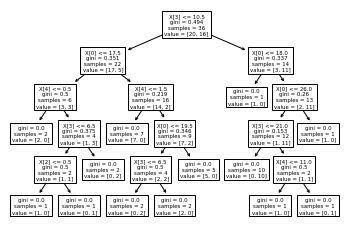

In [ ]:
sklearn.tree.plot_tree(clf)

In [ ]:
#hacemos esto debido a que no se aprecia bien el grafo
tree.export_graphviz(clf,out_file="london.dot", 
                     filled = True)

Árboles de decisión con los datos relacionales

In [ ]:
clf_relacionales = tree.DecisionTreeClassifier()
clf_relacionales = clf_relacionales.fit(atributos_entrenamiento_relacional , objetivo_entrenamiento_relacional)

In [ ]:
scores = cross_val_score(clf_relacionales, X=atributos_entrenamiento_relacional, y=objetivo_entrenamiento_relacional, cv=10)
for i in scores:
  media_score+=i
media_score/=scores.size
media_relacionales=media_score
print("la media de la puntuación mediante validación cruzada para los atributos relacionales es",media_score)

la media de la puntuación mediante validación cruzada para los atributos relacionales es 0.599375


In [ ]:
clf_relacionales.score(atributos_prueba_relacional,objetivo_prueba_relacional)

0.5555555555555556

[Text(193.15384615384616, 199.32, 'X[3] <= 10.5\ngini = 0.494\nsamples = 36\nvalue = [20, 16]'),
 Text(103.01538461538462, 163.07999999999998, 'X[0] <= 17.5\ngini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(51.50769230769231, 126.83999999999999, 'X[8] <= 0.142\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(25.753846153846155, 90.6, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(77.26153846153846, 90.6, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(154.52307692307693, 126.83999999999999, 'X[7] <= 5.5\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(128.76923076923077, 90.6, 'X[8] <= 0.085\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(103.01538461538462, 54.359999999999985, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(154.52307692307693, 54.359999999999985, 'X[3] <= 6.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(128.76923076923077, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(180.27692307692308, 18.119999999999976, 'gini = 0

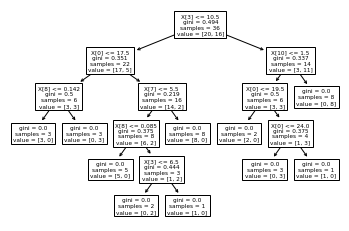

In [ ]:
sklearn.tree.plot_tree(clf_relacionales)

In [ ]:
#hacemos esto debido a que no se aprecia bien el grafo
tree.export_graphviz(clf,out_file="londonRelacionales.dot", 
                     filled = True)

In [ ]:
clf_grado = tree.DecisionTreeClassifier()
clf_grado = clf_grado.fit(atributos_entrenamiento_grado , objetivo_entrenamiento_grado)
scores = cross_val_score(clf_grado, X=atributos_entrenamiento_grado, y=objetivo_entrenamiento_grado, cv=10)
for i in scores:
  media_score+=i
media_score/=scores.size
media_grado=media_score
print("la media de la puntuación mediante validación cruzada es",media_score)


la media de la puntuación mediante validación cruzada es 0.7099375


In [ ]:
clf_centralidad = tree.DecisionTreeClassifier()
clf_centralidad = clf_centralidad.fit(atributos_entrenamiento_centrality , objetivo_entrenamiento_centrality)
scores = cross_val_score(clf_centralidad, X=atributos_entrenamiento_centrality, y=objetivo_entrenamiento_centrality, cv=10)
for i in scores:
  media_score+=i
media_score/=scores.size
media_centralidad=media_score
print("la media de la puntuación mediante validación cruzada para los atributos relacionales es",media_score)

la media de la puntuación mediante validación cruzada para los atributos relacionales es 0.67099375


In [ ]:
clf_clustering = tree.DecisionTreeClassifier()
clf_clustering = clf_clustering.fit(atributos_entrenamiento_clustering , objetivo_entrenamiento_clustering)
scores = cross_val_score(clf_relacionales, X=atributos_entrenamiento_clustering, y=objetivo_entrenamiento_clustering, cv=10)
for i in scores:
  media_score+=i
media_score/=scores.size
media_coloreado=media_score
print("la media de la puntuación mediante validación cruzada es",media_score)

la media de la puntuación mediante validación cruzada es 0.6337660416666667


In [ ]:
clf_coloreado = tree.DecisionTreeClassifier()
clf_coloreado = clf_coloreado.fit(atributos_entrenamiento_coloreado , objetivo_entrenamiento_coloreado)
scores = cross_val_score(clf_coloreado, X=atributos_entrenamiento_coloreado, y=objetivo_entrenamiento_coloreado, cv=10)
for i in scores:
  media_score+=i
media_score/=scores.size
media_coloreado=media_score
print("la media de la puntuación mediante validación cruzada es",media_score)

la media de la puntuación mediante validación cruzada es 0.5967099375


In [ ]:
print("la media de la puntuación es:")

print("Para los atributos originales ",media_originales)
print("Para los atributos relacionales ",media_relacionales)
print("Para el atributo relacional grado",media_score_grado)
print("Para el atributo relacional centralidad ",media_centralidad)
print("Para el atributo relacional clustering ",media_score_clustering)
print("Para el atributo relacional coloreado ",media_coloreado)

la media de la puntuación es:
Para los atributos originales  0.6604166666666667
Para los atributos relacionales  0.599375
Para el atributo relacional grado 0.725
Para el atributo relacional centralidad  0.67099375
Para el atributo relacional clustering  0.7583333333333334
Para el atributo relacional coloreado  0.5967099375
